# **NBA Most Improved Player/Most Valuable Player Predictor**
---


# **Data Science Final Portfolio**
*By* **Gabriel Epstein** *and* **Patrick Callahan**

**Project Websites**

[Final Portfolio GitHub Repository](https://github.com/GabrielEpstein/DataScienceFinalPortfolio)

[Final Portfolio Project Planning](https://github.com/users/GabrielEpstein/projects/6)

[Final Portfolio Website (Hosted by GitHub Pages)](https://gabrielepstein.github.io/DataScienceFinalPortfolio/)

## **Project Background, Logistics, Goals, and Data**

**Motivation:** This project is our Final Project Portfolio for the Intro To Data Science Course (CMPS-3160) at Tulane University.


**Project Idea / Plan:** Stats tell a story. The NBA MVP award (like the MIP award) is selected based on the subjective opinion of broadcasters, announcers, sports journalists, etc. These people each get to cast votes (1st place, 2nd place, and 3rd place votes are all worth a different amount of points, 1st being worth the most) for who they believe is the MVP. The player with the highest share of votes is the winner. The equation for this is as follows:

$\text{Share} = \frac{\text{MVP Voting Points}}{ \text{Total Possible MVP Points}}$

We want to discover if we can predict the Most Valuable or Improved Player through data analytics, or if there are chapters missing from that story.

The data below incorporates many advanced statistics, including play by play information for every player, season wide basic statistics, statistics per 100 possessions, and more. We believe we can use a combination of this data to create a model that can determine the upcoming NBA MVP.

**Project Goal:** Our goal is to develop a predictive model that accurately anticipates the next NBA MVP based on a variety of metrics including historical performance data and individual statistics, to uncover the most influential factors contributing to MVP recognition by conducting in-depth analyses of individual and team statistics and to test the model against historical MVP outcomes to assess its performance through cross-validation techniques.

**Collaboration Plan**

Our plan is to meet once a week, whether it's after class or on Zoom. We have a  [GitHub Repository](https://github.com/GabrielEpstein/DataScienceFinalPortfolio) with a [project timeline](https://github.com/users/GabrielEpstein/projects/6) and a shared Google Colab Notebook to work on the project. We will meet to discuss our progress and the direction we are heading, and work on our assigned tasks individually, collaborating with eachother when necessary and keeping eachother informed on our current goal.

**Relevant Links:**

*NBA Stat FAQ to help identify statistics used and discrepencies in statistics tracked*

[FAQ | Stats | NBA.com](https://www.nba.com/stats/help/faq)

*The following data is used in Milestone 1*

We downloaded the following dataset and its accompanying .csv files to upload to Google Drive for access in our ETL:

[NBA Stats (1947-Present)](https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats/data)

*The following data may be used in Milestone 2 and beyond*


[NBA Database](https://www.kaggle.com/datasets/wyattowalsh/basketball)


# **Extraction, Transformation, and Loading!**

Note: Below shows exactly what *we* did, and how *we* did it. The only difference is that we have included instructions for visitors from GitHub for running the project.

Our project begins with ETL.

Below, we are mounting Google Drive, importing libraries, and importing data to be used for Milestone 1.

**Mounting Google Drive**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Instructions to users to navigate to the folder where they have uploaded the zip file
print("Navigate to the directory in Google Drive where you have uploaded your project ZIP file.")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Mounting my google drive for access to the datasets
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Colab Notebooks/Data Science Final Portfolio

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Data Science Final Portfolio'
/content


In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/Player Per Game.csv'

# Read the CSV file
player_per_game_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(player_per_game_df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/Player Per Game.csv'

In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/Player Shooting.csv'

# Read the CSV file
player_shooting_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(player_shooting_df.head())


   seas_id  season  player_id         player  birth_year pos  age  experience  \
0    31136    2024       5025     A.J. Green         NaN  SG   24           2   
1    31137    2024       5026    A.J. Lawson         NaN  SG   23           2   
2    31138    2024       5027     AJ Griffin         NaN  SF   20           2   
3    31139    2024       4219   Aaron Gordon         NaN  PF   28          10   
4    31140    2024       4582  Aaron Holiday         NaN  PG   27           6   

    lg   tm  ...  fg_percent_from_x16_3p_range  fg_percent_from_x3p_range  \
0  NBA  MIL  ...                         0.556                      0.408   
1  NBA  DAL  ...                         1.000                      0.310   
2  NBA  ATL  ...                         0.333                      0.273   
3  NBA  DEN  ...                         0.417                      0.289   
4  NBA  HOU  ...                         0.316                      0.392   

   percent_assisted_x2p_fg  percent_assisted_x3p_f

**Importing Libraries:** Below, we are importing some of the libraries we will be using to analyze this data in Jupyter Notebooks. So far, I am using Pandas and NumPy libraries, and will be using MatLab's Plotting Library as well as Seaborn.

In [ ]:
# Importing different libraries for use in analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None, 'max_colwidth', None)

 **Importing Data:** Here, we are importing some data from the first dataset to use that we found from [Kaggle](https://kaggle.com), the "world's largest data science community with powerful tools and resources to help you achieve your data science goals." Then we use the .head() function to visually verify that the dataset seems to have been imported without problems!

*About the Data:* This data is from the 'Player Shooting' csv. It contains stats by player and season pretaining to individual players shooting statistics, including their field goal percentage, the average distance of their field goals, their field goal attempts and percentages by distance, and more.


In [ ]:
#Reading two of the csv files and displaying the first five rows with .head()
player_shooting_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro to Data Science/Data Science Final Portfolio/Data Sets/NBA Stats (1947-Present)/Player Shooting.csv')
player_per_game_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro to Data Science/Data Science Final Portfolio/Data Sets/NBA Stats (1947-Present)/Player Per Game.csv')
player_shooting_df.head()


,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made
0,31136,2024,5025,A.J. Green,NaN,SG,24,2,NBA,MIL,...,0.500,0.423,1.000,0.915,0.000,0,0.216,0.542,0,0
1,31137,2024,5026,A.J. Lawson,NaN,SG,23,2,NBA,DAL,...,NaN,0.325,0.519,1.000,0.129,10,0.650,0.308,0,0
2,31138,2024,5027,AJ Griffin,NaN,SF,20,2,NBA,ATL,...,0.333,0.273,0.750,0.889,0.022,1,0.242,0.250,0,0
3,31139,2024,4219,Aaron Gordon,NaN,PF,28,10,NBA,DEN,...,0.364,0.293,0.644,0.793,0.262,128,0.364,0.389,1,0
4,31140,2024,4582,Aaron Holiday,NaN,PG,27,6,NBA,HOU,...,0.286,0.410,0.274,0.838,0.006,2,0.229,0.447,1,0


In [ ]:
# Displaying the second dataframe
player_per_game_df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,1.000,0.2,0.9,1.0,0.5,0.1,0.1,0.1,0.9,4.3
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.632,0.4,0.8,1.2,0.5,0.3,0.1,0.4,0.7,3.8
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,1.000,0.1,0.7,0.8,0.2,0.1,0.1,0.3,0.3,2.1
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.652,2.4,4.1,6.5,3.2,0.9,0.7,1.5,1.9,13.9
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.889,0.3,1.4,1.7,1.8,0.5,0.1,0.8,1.6,7.0


## Data Cleanup

### Cleaning player_shooting_df
Let's start with the player_shooting_df. We will identify the unique columns in the data, checking the dtypes, checking for NaNs, and filling in some missing data.

In [ ]:
#See unique column names
player_shooting_df.columns.unique()

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'mp', 'fg_percent', 'avg_dist_fga',
       'percent_fga_from_x2p_range', 'percent_fga_from_x0_3_range',
       'percent_fga_from_x3_10_range', 'percent_fga_from_x10_16_range',
       'percent_fga_from_x16_3p_range', 'percent_fga_from_x3p_range',
       'fg_percent_from_x2p_range', 'fg_percent_from_x0_3_range',
       'fg_percent_from_x3_10_range', 'fg_percent_from_x10_16_range',
       'fg_percent_from_x16_3p_range', 'fg_percent_from_x3p_range',
       'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
       'percent_dunks_of_fga', 'num_of_dunks', 'percent_corner_3s_of_3pa',
       'corner_3_point_percent', 'num_heaves_attempted', 'num_heaves_made'],
      dtype='object')

In [ ]:
# Checking the dtypes of the different columns
player_shooting_df.dtypes

seas_id                            int64
season                             int64
player_id                          int64
player                            object
birth_year                       float64
pos                               object
age                                int64
experience                         int64
lg                                object
tm                                object
g                                  int64
mp                                 int64
fg_percent                       float64
avg_dist_fga                     float64
percent_fga_from_x2p_range       float64
percent_fga_from_x0_3_range      float64
percent_fga_from_x3_10_range     float64
percent_fga_from_x10_16_range    float64
percent_fga_from_x16_3p_range    float64
percent_fga_from_x3p_range       float64
fg_percent_from_x2p_range        float64
fg_percent_from_x0_3_range       float64
fg_percent_from_x3_10_range      float64
fg_percent_from_x10_16_range     float64
fg_percent_from_

In [ ]:
# Checking for NaNs
player_shooting_df.isnull().sum()

seas_id                              0
season                               0
player_id                            0
player                               0
birth_year                       16531
pos                                  0
age                                  0
experience                           0
lg                                   0
tm                                   0
g                                    0
mp                                   0
fg_percent                         109
avg_dist_fga                       109
percent_fga_from_x2p_range         109
percent_fga_from_x0_3_range        109
percent_fga_from_x3_10_range       109
percent_fga_from_x10_16_range      109
percent_fga_from_x16_3p_range      109
percent_fga_from_x3p_range         109
fg_percent_from_x2p_range          190
fg_percent_from_x0_3_range         578
fg_percent_from_x3_10_range        920
fg_percent_from_x10_16_range      1345
fg_percent_from_x16_3p_range      1481
fg_percent_from_x3p_range

Since we are missing a lot of birth years but no ages, we will drop the 'birth_year' column using the Pandas .drop() function



In [ ]:
# Using the .drop() function and specifying inplace = True to make the changes permanent within the dataframe.
player_shooting_df.drop(columns = 'birth_year', inplace = True)
player_shooting_df.head()

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made
0,31136,2024,5025,A.J. Green,SG,24,2,NBA,MIL,39,...,0.500,0.423,1.000,0.915,0.000,0,0.216,0.542,0,0
1,31137,2024,5026,A.J. Lawson,SG,23,2,NBA,DAL,28,...,NaN,0.325,0.519,1.000,0.129,10,0.650,0.308,0,0
2,31138,2024,5027,AJ Griffin,SF,20,2,NBA,ATL,18,...,0.333,0.273,0.750,0.889,0.022,1,0.242,0.250,0,0
3,31139,2024,4219,Aaron Gordon,PF,28,10,NBA,DEN,54,...,0.364,0.293,0.644,0.793,0.262,128,0.364,0.389,1,0
4,31140,2024,4582,Aaron Holiday,PG,27,6,NBA,HOU,56,...,0.286,0.410,0.274,0.838,0.006,2,0.229,0.447,1,0


*Challenge:* It appears that there is a discrepancy between the number of players who did not attempt any field goals within a two-point range, and the number of players with NaN values for their field goal percentage from two-point range. To address this, we will conditionally replace values of NaN with 0 for players who did attempt two-point range shots but are missing percentages for two-point range shots.

(This is something we will have to address when doing statistical analysis later on, as we will have to decide whether to include players who have not take certain types of shot from that analysis so as to avoid skewing the data by filling NaNs with 0s.)

In [ ]:
# Here we will attempt to minimize the discrepancy of NaN and 0 percentages for two-point shot attempts

# Define the columns which indicate percentage of field goals attempted from two-point ranges and three-point range
attempt_columns = [
    'percent_fga_from_x2p_range',
    'percent_fga_from_x0_3_range',
    'percent_fga_from_x3_10_range',
    'percent_fga_from_x10_16_range',
    'percent_fga_from_x16_3p_range',
    'percent_fga_from_x3p_range'
]

# Define the corresponding shooting percentage columns
percent_columns = [
    'fg_percent_from_x2p_range',
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]

# Create a copy of the dataframe for the relevant columns before replacement
before_replacement = player_shooting_df[attempt_columns + percent_columns].copy()

# Apply conditional logic to fill NaNs where attempt percentage >= 0
for attempt_col, percent_col in zip(attempt_columns, percent_columns):

    # Replace NaNs with 0 in the shooting percentage column where attempt percentage is >= 0
    player_shooting_df.loc[player_shooting_df[attempt_col] >= 0, percent_col] = player_shooting_df.loc[player_shooting_df[attempt_col] >= 0, percent_col].fillna(0)

# After replacements - check for differences
after_replacement = player_shooting_df[attempt_columns + percent_columns]

# Check if there are rows with attempt percentage >= 0 but corresponding shooting percentage is NaN after the operation
for attempt_col, percent_col in zip(attempt_columns, percent_columns):
    condition = (after_replacement[attempt_col] >= 0) & (after_replacement[percent_col].isnull())
    if condition.any():
        print(f"Rows with non-negative attempts in {attempt_col} but NaN in {percent_col} after replacement:")
        print(after_replacement[condition][[attempt_col, percent_col]])
    else:
        print(f"No discrepancies found in {attempt_col} and {percent_col} after replacement.")

No discrepancies found in percent_fga_from_x2p_range and fg_percent_from_x2p_range after replacement.
No discrepancies found in percent_fga_from_x0_3_range and fg_percent_from_x0_3_range after replacement.
No discrepancies found in percent_fga_from_x3_10_range and fg_percent_from_x3_10_range after replacement.
No discrepancies found in percent_fga_from_x10_16_range and fg_percent_from_x10_16_range after replacement.
No discrepancies found in percent_fga_from_x16_3p_range and fg_percent_from_x16_3p_range after replacement.
No discrepancies found in percent_fga_from_x3p_range and fg_percent_from_x3p_range after replacement.


It appears we will have to work on cleaning up this data some more another time. This will likely involve manually sifting through the csv file to check what is happening with NaNs to see how we should appropriately handle them!

### Cleaning player_per_game_df
Now let's do some cleaning for our player_per_game_df. We will do the same process that we did for player_shooting_df.

In [ ]:
#See unique column names
player_per_game_df.columns.unique()

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game'],
      dtype='object')

In [ ]:
# Checking the dtypes of the different columns
player_per_game_df.dtypes

seas_id            int64
season             int64
player_id          int64
player            object
birth_year       float64
pos               object
age              float64
experience         int64
lg                object
tm                object
g                  int64
gs               float64
mp_per_game      float64
fg_per_game      float64
fga_per_game     float64
fg_percent       float64
x3p_per_game     float64
x3pa_per_game    float64
x3p_percent      float64
x2p_per_game     float64
x2pa_per_game    float64
x2p_percent      float64
e_fg_percent     float64
ft_per_game      float64
fta_per_game     float64
ft_percent       float64
orb_per_game     float64
drb_per_game     float64
trb_per_game     float64
ast_per_game     float64
stl_per_game     float64
blk_per_game     float64
tov_per_game     float64
pf_per_game      float64
pts_per_game     float64
dtype: object

In [ ]:
# Checking for NaNs
player_per_game_df.isnull().sum()

seas_id              0
season               0
player_id            0
player               0
birth_year       28944
pos                  0
age                 22
experience           0
lg                   0
tm                   0
g                    0
gs                8637
mp_per_game       1083
fg_per_game          0
fga_per_game         0
fg_percent         163
x3p_per_game      6352
x3pa_per_game     6352
x3p_percent      10545
x2p_per_game         0
x2pa_per_game        0
x2p_percent        250
e_fg_percent       163
ft_per_game          0
fta_per_game         0
ft_percent        1303
orb_per_game      4657
drb_per_game      4657
trb_per_game       894
ast_per_game         0
stl_per_game      5626
blk_per_game      5625
tov_per_game      5635
pf_per_game          0
pts_per_game         0
dtype: int64

In [ ]:
# Using the .drop() function and specifying inplace = True to make the changes permanent within the dataframe.
player_per_game_df.drop(columns = 'birth_year', inplace = True)
player_per_game_df.head()

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,31136,2024,5025,A.J. Green,SG,24.0,2,NBA,MIL,39,...,1.000,0.2,0.9,1.0,0.5,0.1,0.1,0.1,0.9,4.3
1,31137,2024,5026,A.J. Lawson,SG,23.0,2,NBA,DAL,28,...,0.632,0.4,0.8,1.2,0.5,0.3,0.1,0.4,0.7,3.8
2,31138,2024,5027,AJ Griffin,SF,20.0,2,NBA,ATL,18,...,1.000,0.1,0.7,0.8,0.2,0.1,0.1,0.3,0.3,2.1
3,31139,2024,4219,Aaron Gordon,PF,28.0,10,NBA,DEN,54,...,0.652,2.4,4.1,6.5,3.2,0.9,0.7,1.5,1.9,13.9
4,31140,2024,4582,Aaron Holiday,PG,27.0,6,NBA,HOU,56,...,0.889,0.3,1.4,1.7,1.8,0.5,0.1,0.8,1.6,7.0


Let's see where the NaN values for age are.

In [ ]:
# Filtering the dataframe for rows where the 'age' column is NaN
ppg_nan_age_df = player_per_game_df[player_per_game_df['age'].isnull()]
ppg_nan_age_df.head(30)

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
26500,5554,1973,1470,Pete Smith,PF,NaN,1,ABA,SDA,5,...,NaN,0.6,1.0,1.6,0.2,NaN,NaN,1.0,1.0,0.8
27132,4391,1971,1253,Clarence Brookins,F,NaN,1,ABA,FLO,8,...,0.417,1.0,0.5,1.5,0.1,NaN,NaN,0.0,0.6,2.6
27286,4545,1971,1291,Jim Wilson,G,NaN,1,ABA,PTC,6,...,0.667,0.2,0.8,1.0,1.3,NaN,NaN,0.8,0.5,1.0
27888,4293,1970,1231,Walter Byrd,PF,NaN,1,ABA,MMF,22,...,0.294,0.4,0.8,1.1,0.3,NaN,NaN,0.4,1.0,1.5
27899,4304,1970,1233,Wilbur Kirkland,F,NaN,1,ABA,PTP,2,...,NaN,0.5,5.0,5.5,0.5,NaN,NaN,1.0,2.5,3.0
27972,3550,1969,1081,Charles Parks,F,NaN,1,ABA,DNR,2,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.5,0.0
28349,3141,1968,904,Bill Allen,C,NaN,1,ABA,ANA,38,...,0.586,NaN,NaN,7.1,0.6,NaN,NaN,1.0,3.2,7.9
28378,3170,1968,922,Bobby Wilson,PF,NaN,1,ABA,DLC,69,...,0.615,NaN,NaN,6.5,0.8,NaN,NaN,1.8,3.0,8.9
28404,3196,1968,939,Darrell Hardy,F,NaN,1,ABA,HSM,17,...,0.714,NaN,NaN,3.3,0.5,NaN,NaN,0.7,1.4,5.2
28414,3206,1968,945,Dexter Westbrook,F,NaN,1,ABA,TOT,12,...,0.714,NaN,NaN,1.9,0.4,NaN,NaN,1.1,2.5,4.0


Looks like all of the NaN values are from players in the ABA, an older, short lived league (American Basketball Association) that ended up merging with the NBA in 1979. Since we are looking at the NBA for this project, let's drop all the entries that are not in the NBA from this csv!

In [ ]:
# Filter the dataframe to keep only rows where 'lg' is 'NBA', overwriting the original DataFrame
player_per_game_df = player_per_game_df[player_per_game_df['lg'] == 'NBA']

# Now player_per_game_df contains only entries from the NBA
(player_per_game_df['lg']!='NBA').sum()

0

Great! Now let's do the same thing for the player_shooting_df, since we didn't think of doing it before, then we'll get back to cleaning our player_per_game_df.

In [ ]:
# Filter the dataframe to keep only rows where 'lg' is 'NBA', overwriting the original DataFrame
player_shooting_df = player_shooting_df[player_shooting_df['lg'] == 'NBA']

# Now player_per_game_df contains only entries from the NBA
(player_shooting_df['lg']!='NBA').sum()

0

Let's check the NaNs of our updated dataframes.

In [ ]:
player_per_game_df.isnull().sum()

seas_id             0
season              0
player_id           0
player              0
pos                 0
age                 0
experience          0
lg                  0
tm                  0
g                   0
gs               6417
mp_per_game       501
fg_per_game         0
fga_per_game        0
fg_percent        146
x3p_per_game     5770
x3pa_per_game    5770
x3p_percent      9621
x2p_per_game        0
x2pa_per_game       0
x2p_percent       233
e_fg_percent      146
ft_per_game         0
fta_per_game        0
ft_percent       1228
orb_per_game     3900
drb_per_game     3900
trb_per_game      312
ast_per_game        0
stl_per_game     3900
blk_per_game     3900
tov_per_game     5052
pf_per_game         0
pts_per_game        0
dtype: int64

No missing games (g), but 6,417 missing games started (gs). Is this a result of these players not playing in games (in which case, filling gs with 0 would be more appropriate) or is there missing data? Let's investigate.

In [ ]:
# Filter the dataframe for rows where 'gs' is NaN but 'g' is greater than 0
missing_gs_played_games = player_per_game_df[(player_per_game_df['gs'].isnull()) & (player_per_game_df['g'] > 0)]

# Display the first few rows of this filtered dataframe to investigate
print(missing_gs_played_games[['player', 'g', 'gs']].head(20))

                player   g  gs
23143    Abdul Jeelani  66 NaN
23144   Adrian Dantley  80 NaN
23145       Alan Hardy  22 NaN
23146     Alex English  81 NaN
23147    Allan Bristow  82 NaN
23148    Allen Leavell  79 NaN
23149      Alvan Adams  75 NaN
23150      Alvin Scott  82 NaN
23151   Andre McCarter  43 NaN
23153  Anthony Roberts  26 NaN
23154      Armond Hill  75 NaN
23155      Armond Hill  24 NaN
23156      Armond Hill  51 NaN
23157      Art Collins  29 NaN
23158    Artis Gilmore  82 NaN
23159      Austin Carr  47 NaN
23160      Austin Carr   8 NaN
23161      Austin Carr  39 NaN
23162     Ben Poquette  82 NaN
23163     Bernard King  81 NaN


In [21]:
missing_gs_played_games.loc[23104]

seas_id                   8348
season                    1981
player_id                 1845
player           Abdul Jeelani
pos                         SF
age                       26.0
experience                   2
lg                         NBA
tm                         DAL
g                           66
gs                         NaN
mp_per_game               16.8
fg_per_game                2.8
fga_per_game               6.7
fg_percent               0.425
x3p_per_game               0.0
x3pa_per_game              0.0
x3p_percent                0.0
x2p_per_game               2.8
x2pa_per_game              6.7
x2p_percent              0.426
e_fg_percent             0.425
ft_per_game                2.7
fta_per_game               3.3
ft_percent               0.814
orb_per_game               1.3
drb_per_game               2.2
trb_per_game               3.5
ast_per_game               1.0
stl_per_game               0.7
blk_per_game               0.5
tov_per_game               1.3
pf_per_g

According to [FAQ | Stats | NBA.com](https://www.nba.com/stats/help/faq), certain stats were not tracked until later on in the league's history. There also seem to be some missing values, even after these stats were tracked. For example, Abdul Jeelani does not have any data pertaining to games started in 1981, even though the league began tracking games started in 1971. We will have to decide how to address this later on when doing deeper analytics.

Next, we will move onto EDA.

# **Exploratory Data Analysis**

In this section, we will do some light EDA on our data showing 3 - 5 interesting summary statistics, a graphic showing an interesting property or distribution in the data and explaining their relevance to our question / investigation.

## Summary Statistics

Let's look at some basic summary statistics.

In [ ]:
# Let's look at the average percentage of field goal attempts from 3-point range
player_shooting_df['percent_fga_from_x3p_range'].mean()

0.26224351896303405

This is an interesting statistic (the average percentage of field goal attempts from 3-point range) in terms of league wide MVPs. For context, there have been 14 back-to-back league MVPs (by 12 players), and 3 back-to-back-to-back MVPs (MVP 3 years in a row) in league history. Looking at recent years, there have been 3 back-to-back MVPs, including Stephen Curry who won back-to-back MVPs in the 2014-2015 and 2015-2016 seasons. Stephen Curry is notorious for changing the league with his 'lights-out' 3-point shooting, landing him the first (and only) unanimous MVP in league history. Could this be indicative of 3-point shooting being a key factor in league MVP?

In [22]:
# Let's see Steph Curry's shooting from the 2015-2016 season (his unanimous MVP season).
player_shooting_df[(player_shooting_df['player'] == 'Stephen Curry') & (player_shooting_df['season'] == 2016)][['percent_fga_from_x3p_range', 'fg_percent_from_x3p_range']]

,percent_fga_from_x3p_range,fg_percent_from_x3p_range
6006,0.554,0.454


As you can see, the first and only unanimous NBA MVP took 55.4% of all of his shots that season from the 3-point range, and was shooting 45.4% from 3-point range. How does this compare to the other two recent back-to-back league MVPs? Those two players would be Giannis Antentekounmpo and Nikola Jokic. Giannis Antetokounmpo won back-to-back MVP awards in the 2018-2019 and 2019-2020 Seasons. Nikola Jokić won back-to-back MVP awards in 2020-2021 and 2021-2022.

In [23]:
# Let's filter for each player and their MVP seasons
curry_stats = player_shooting_df[
    (player_shooting_df['player'] == 'Stephen Curry') &
    ((player_shooting_df['season'] == 2015) | (player_shooting_df['season'] == 2016))][['player', 'season', 'percent_fga_from_x3p_range', 'fg_percent_from_x3p_range']]

giannis_stats = player_shooting_df[
    (player_shooting_df['player'] == 'Giannis Antetokounmpo') &
    ((player_shooting_df['season'] == 2019) | (player_shooting_df['season'] == 2020))][['player', 'season', 'percent_fga_from_x3p_range', 'fg_percent_from_x3p_range']]

jokic_stats = player_shooting_df[
    (player_shooting_df['player'] == 'Nikola Jokić') &
    ((player_shooting_df['season'] == 2021) | (player_shooting_df['season'] == 2022))][['player', 'season', 'percent_fga_from_x3p_range', 'fg_percent_from_x3p_range']]

# Concatenating the dataframes for easy viewing
mvp_comparison = pd.concat([curry_stats, giannis_stats, jokic_stats])

# Resetting the index for better readability
mvp_comparison.reset_index(drop=True, inplace=True)

mvp_comparison

,player,season,percent_fga_from_x3p_range,fg_percent_from_x3p_range
0,Stephen Curry,2016,0.554,0.454
1,Stephen Curry,2015,0.482,0.443
2,Giannis Antetokounmpo,2020,0.237,0.304
3,Giannis Antetokounmpo,2019,0.163,0.256
4,Nikola Jokić,2022,0.220,0.337
5,Nikola Jokić,2021,0.183,0.388


Interesting, the two more recent back-to-back (though not unanimous) MVPs were not particularly frequent 3-point shooters!

Let's look at another summary statistic, this time from player_per_game_df.

In [24]:
# Looking at effective field goal percent, defined by the NBA as follows: "eFG% measures field goal percentage adjusting for the fact that a 3-point field goal is worth one more point than a 2-point field goal. The formula is eFG% = ((FGM + (0.5 * 3PM)) / FGA"
player_per_game_df['e_fg_percent'].mean()

0.45996369872317305

In [25]:
# Filter for Stephen Curry's back-to-back MVP seasons (2014-2015, 2015-2016)
curry_efg = player_per_game_df[
    (player_per_game_df['player'] == 'Stephen Curry') &
    ((player_per_game_df['season'] == 2015) | (player_per_game_df['season'] == 2016))
][['player', 'season', 'e_fg_percent']]

# Filter for Giannis Antetokounmpo's back-to-back MVP seasons (2018-2019, 2019-2020)
giannis_efg = player_per_game_df[
    (player_per_game_df['player'] == 'Giannis Antetokounmpo') &
    ((player_per_game_df['season'] == 2019) | (player_per_game_df['season'] == 2020))
][['player', 'season', 'e_fg_percent']]

# Filter for Nikola Jokić's back-to-back MVP seasons (2020-2021, 2021-2022)
jokic_efg = player_per_game_df[
    (player_per_game_df['player'] == 'Nikola Jokić') &
    ((player_per_game_df['season'] == 2021) | (player_per_game_df['season'] == 2022))
][['player', 'season', 'e_fg_percent']]

# Concatenate the filtered DataFrames
mvp_efg_comparison = pd.concat([curry_efg, giannis_efg, jokic_efg])

# Reset the index for better readability
mvp_efg_comparison.reset_index(drop=True, inplace=True)

mvp_efg_comparison


,player,season,e_fg_percent
0,Stephen Curry,2016,0.630
1,Stephen Curry,2015,0.594
2,Giannis Antetokounmpo,2020,0.589
3,Giannis Antetokounmpo,2019,0.599
4,Nikola Jokić,2022,0.620
5,Nikola Jokić,2021,0.602


Hmm, it seems that the 3 back-to-back MVPs have much more similar Effective Field Goal Percentages than 3-point statistics. They are all notably higher than the average across the dataset (roughtly 30% higher than the mean), and they are all within 4% of eachother!

Finally, let's look at a third statistic: field goal attempts per game.

In [26]:
# Filter for Stephen Curry's back-to-back MVP seasons (2014-2015, 2015-2016)
curry_fga = player_per_game_df[
    (player_per_game_df['player'] == 'Stephen Curry') &
    ((player_per_game_df['season'] == 2015) | (player_per_game_df['season'] == 2016))
][['player', 'season', 'fga_per_game']]

# Filter for Giannis Antetokounmpo's back-to-back MVP seasons (2018-2019, 2019-2020)
giannis_fga = player_per_game_df[
    (player_per_game_df['player'] == 'Giannis Antetokounmpo') &
    ((player_per_game_df['season'] == 2019) | (player_per_game_df['season'] == 2020))
][['player', 'season', 'fga_per_game']]

# Filter for Nikola Jokić's back-to-back MVP seasons (2020-2021, 2021-2022)
jokic_fga = player_per_game_df[
    (player_per_game_df['player'] == 'Nikola Jokić') &
    ((player_per_game_df['season'] == 2021) | (player_per_game_df['season'] == 2022))
][['player', 'season', 'fga_per_game']]

# Concatenate the filtered DataFrames
mvp_fga_comparison = pd.concat([curry_fga, giannis_fga, jokic_fga])

# Reset the index for better readability
mvp_fga_comparison.reset_index(drop=True, inplace=True)

mvp_fga_comparison


,player,season,fga_per_game
0,Stephen Curry,2016,20.2
1,Stephen Curry,2015,16.8
2,Giannis Antetokounmpo,2020,19.7
3,Giannis Antetokounmpo,2019,17.3
4,Nikola Jokić,2022,17.7
5,Nikola Jokić,2021,18.0


Can we now compare field goal attempts per game with effective field goal percent per game? Let's see below.

## Visualizations

Let's look at some of the data graphically

In [27]:
# Combine the two DataFrames on 'player' and 'season'
mvp_stats_comparison = pd.merge(mvp_efg_comparison, mvp_fga_comparison, on=['player', 'season'])

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Plot 1: FGA per game
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.barplot(data=mvp_stats_comparison, x='player', y='fga_per_game', palette='Blues_d')
plt.title('Field Goal Attempts per Game (FGA per Game)')
plt.xlabel('Player')
plt.ylabel('FGA per Game')

# Plot 2: eFG%
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.barplot(data=mvp_stats_comparison, x='player', y='e_fg_percent', palette='Greens_d')
plt.title('Effective Field Goal Percentage (eFG%)')
plt.xlabel('Player')
plt.ylabel('eFG%')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()



NameError: name 'plt' is not defined

# Further Exploratory Data Analysis (Milestone 2 Starts Here)
**DISCLAIMER**, there were some mild importing issues on google drive regarding the csv files so they have been temporarily manually imported (both the orginial two csv files used in milestone 1 and the new csv file used in milestone 2) (this issue will be fixed soon, everything else should be good)

But 3-point shooting percentage and field goals are just one of many indicators of an MVP caliber player, and we've noticed that despite Gianis or Jokic not being as good a shooter as Stephen Curry, they've won back-to-back MVPs in recent years. What other statistics could we look at?

#Rebounds per game
Total rebound percentage is where we will look next, from the player_per_game dataframe. This was the next place to look because Stephen Curry is quite short compared to Jokic and Giannis, and the latter who've won more MVPs recently are much taller and likely more capable of capturing rebounds. Let's first take a look at the average rebounds of players throughout the league, and then focus on these outstanding players.

In [ ]:
#Average rebounds per game of NBA players
player_per_game_df['trb_per_game'].mean()

3.6793765560519764

Now let's take a look at the rebounds per game for Steph Curry, Jokic, and Giannis, in their respective back-to-back MVP seasons.

In [ ]:
# Let's filter for each player and their MVP seasons
curry_stats = player_per_game_df[
    (player_per_game_df['player'] == 'Stephen Curry') &
    ((player_per_game_df['season'] == 2015) | (player_per_game_df['season'] == 2016))][['player', 'season', 'trb_per_game']]

giannis_stats = player_per_game_df[
    (player_per_game_df['player'] == 'Giannis Antetokounmpo') &
    ((player_per_game_df['season'] == 2019) | (player_per_game_df['season'] == 2020))][['player', 'season', 'trb_per_game']]

jokic_stats = player_per_game_df[
    (player_per_game_df['player'] == 'Nikola Jokić') &
    ((player_per_game_df['season'] == 2021) | (player_per_game_df['season'] == 2022))][['player', 'season', 'trb_per_game']]

# Concatenating the dataframes for easy viewing
mvp_comparison = pd.concat([curry_stats, giannis_stats, jokic_stats])

# Resetting the index for better readability
mvp_comparison.reset_index(drop=True, inplace=True)

mvp_comparison

,player,season,trb_per_game
0,Stephen Curry,2016,5.4
1,Stephen Curry,2015,4.3
2,Giannis Antetokounmpo,2020,13.6
3,Giannis Antetokounmpo,2019,12.5
4,Nikola Jokić,2022,13.8
5,Nikola Jokić,2021,10.8


Wow! Jokic and Giannis averaged significantly more rebounds per game in their respective MVP seasons than Steph Curry did. While Steph Curry had a tremendous impact on the game of basketball (particularly through revolutionizing the value of the 3-pt shot), Jokic and Giannis weren't very good 3-pt shooters but are far better rebounders. Almost a decade after Steph's first MVP season, is this a shifting trend in MVP caliber players?

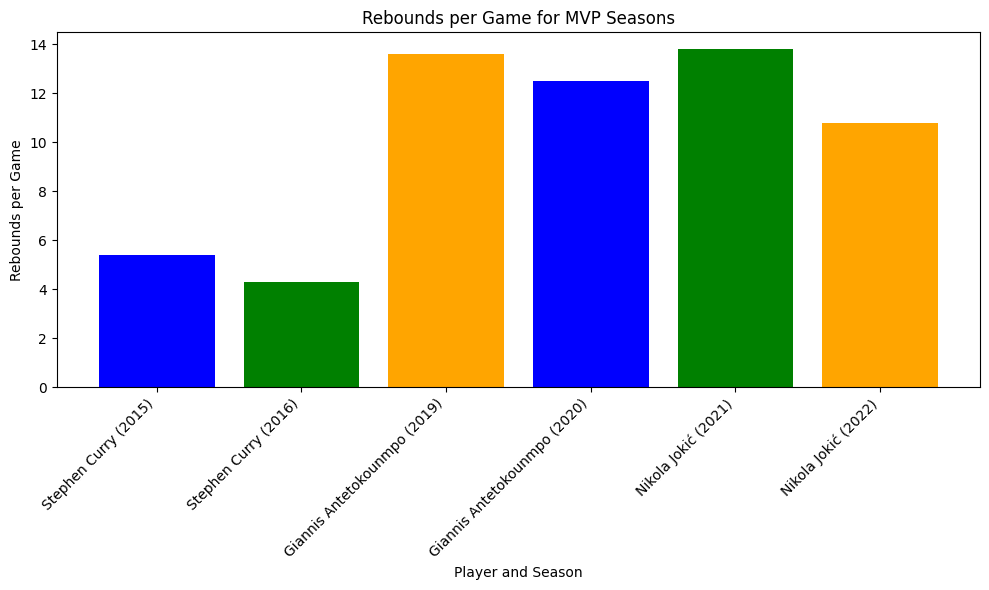

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(mvp_comparison.index, mvp_comparison['trb_per_game'], color=['blue', 'green', 'orange'])

plt.xlabel('Player and Season')
plt.xticks(mvp_comparison.index, ['Stephen Curry (2015)', 'Stephen Curry (2016)', 'Giannis Antetokounmpo (2019)', 'Giannis Antetokounmpo (2020)', 'Nikola Jokić (2021)', 'Nikola Jokić (2022)'], rotation=45, ha='right')

plt.ylabel('Rebounds per Game')

plt.title('Rebounds per Game for MVP Seasons')

plt.tight_layout()
plt.show()


This makes sense, because players with more rebounds give their teams more possession of the ball and subsequently more opportunities to score and win games.

#Assists per game
One more statistic worth looking at is assists per game. Players with high assists per game would be valuable players because it showcases their playmaking abilities and team contribution. These players have excellent court vision, passing skills, and basketball IQ which are key for creating winning teams. First, let's take a look at the average assists per game for NBA players

In [ ]:
#Average assists per game of NBA players
player_per_game_df['ast_per_game'].mean()

1.8880234873283162

So most NBA players do not average even 2 assists per game. Surely the number will by much higher for MVP winners? Let's take a look at the same 3 players we've been taking a look at for the above examples.

In [ ]:
# Let's filter for each player and their MVP seasons
curry_stats = player_per_game_df[
    (player_per_game_df['player'] == 'Stephen Curry') &
    ((player_per_game_df['season'] == 2015) | (player_per_game_df['season'] == 2016))][['player', 'season', 'ast_per_game']]

giannis_stats = player_per_game_df[
    (player_per_game_df['player'] == 'Giannis Antetokounmpo') &
    ((player_per_game_df['season'] == 2019) | (player_per_game_df['season'] == 2020))][['player', 'season', 'ast_per_game']]

jokic_stats = player_per_game_df[
    (player_per_game_df['player'] == 'Nikola Jokić') &
    ((player_per_game_df['season'] == 2021) | (player_per_game_df['season'] == 2022))][['player', 'season', 'ast_per_game']]

# Concatenating the dataframes for easy viewing
mvp_comparison = pd.concat([curry_stats, giannis_stats, jokic_stats])

# Resetting the index for better readability
mvp_comparison.reset_index(drop=True, inplace=True)

mvp_comparison

,player,season,ast_per_game
0,Stephen Curry,2016,6.7
1,Stephen Curry,2015,7.7
2,Giannis Antetokounmpo,2020,5.6
3,Giannis Antetokounmpo,2019,5.9
4,Nikola Jokić,2022,7.9
5,Nikola Jokić,2021,8.3


As expected, MVP winners have a much higher assists per game than the average NBA player. These MVP winners have excellent basketball IQ and are able to dish the ball out to teammates who subsequently score and put their team in a winning position. Let's look at a quick visualization for this.

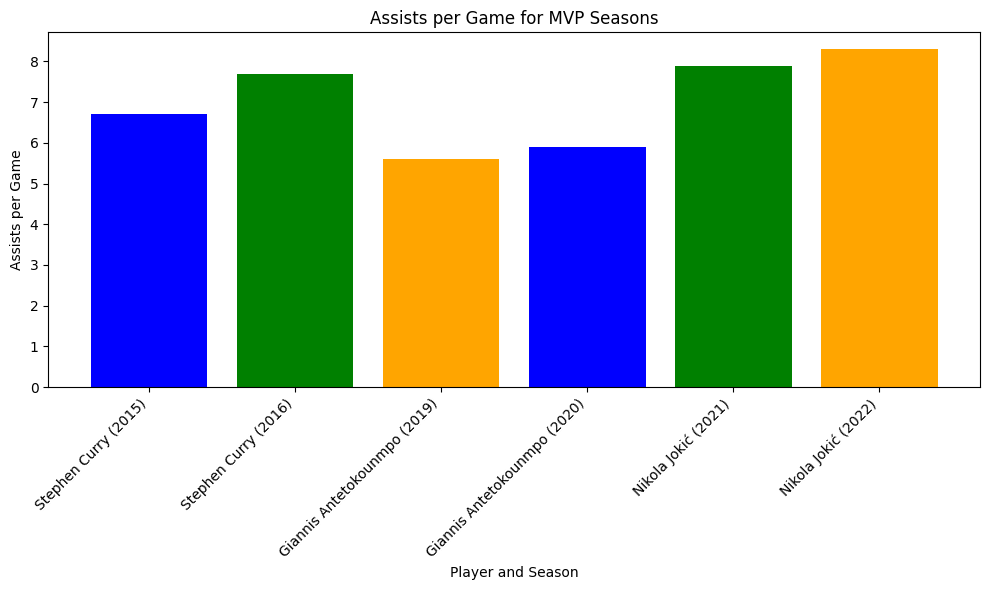

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(mvp_comparison.index, mvp_comparison['ast_per_game'], color=['blue', 'green', 'orange'])

plt.xlabel('Player and Season')
plt.xticks(mvp_comparison.index, ['Stephen Curry (2015)', 'Stephen Curry (2016)', 'Giannis Antetokounmpo (2019)', 'Giannis Antetokounmpo (2020)', 'Nikola Jokić (2021)', 'Nikola Jokić (2022)'], rotation=45, ha='right')

plt.ylabel('Assists per Game')

plt.title('Assists per Game for MVP Seasons')

plt.tight_layout()
plt.show()


From the visualization, we can see that there hasn't been much of a changing trend in the past decade for assists per game of MVP winners. Giannis averaged slightly less assists per game.

# Recap and Next Steps
So far we have taken a look at field goal attemps per game, effective field goal percentage, rebounds per game, and assists per game. From the data visualizations, we know that MVP caliber players average high field goal attemps per game and maintain an effective field goal percentage. We also know they average high assists per game and that within the last decade there has been a shift to MVP winners averaging higher rebounds per game than previous winners.
These statistics will help us create a model to predict the next NBA MVP. However, one more area we should look at involve past MVP winner's teams, and how successful their teams were during these MVP seasons.

# New Dataframe: Team Summaries
We need to import a new dataframe to work with regarding team summaries.

In [ ]:
import pandas as pd

file_path = '/content/Team Summaries.csv'

team_summary_df = pd.read_csv(file_path)

team_summary_df.head()


,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2024,NBA,Atlanta Hawks,ATL,False,26.3,34.0,40.0,34.0,40.0,...,11.3,27.7,0.203,0.572,12.4,74.7,0.192,State Farm Arena,645312.0,16982.0
1,2024,NBA,Boston Celtics,BOS,False,28.3,58.0,16.0,59.0,15.0,...,10.8,24.9,0.187,0.524,10.7,76.4,0.148,TD Garden,670460.0,19156.0
2,2024,NBA,Brooklyn Nets,BRK,False,26.3,29.0,46.0,32.0,43.0,...,11.6,25.1,0.174,0.546,11.7,76.2,0.200,Barclays Center,649363.0,17550.0
3,2024,NBA,Chicago Bulls,CHI,False,28.0,36.0,39.0,34.0,41.0,...,11.0,24.6,0.189,0.554,12.5,76.1,0.194,United Center,781259.0,20559.0
4,2024,NBA,Charlotte Hornets,CHO,False,25.2,18.0,56.0,16.0,58.0,...,12.6,21.7,0.164,0.573,12.4,74.9,0.195,Spectrum Center,590598.0,16406.0


Now we need to clean up the data

In [ ]:
team_summary_df.columns.unique()

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'age', 'w', 'l',
       'pw', 'pl', 'mov', 'sos', 'srs', 'o_rtg', 'd_rtg', 'n_rtg', 'pace',
       'f_tr', 'x3p_ar', 'ts_percent', 'e_fg_percent', 'tov_percent',
       'orb_percent', 'ft_fga', 'opp_e_fg_percent', 'opp_tov_percent',
       'opp_drb_percent', 'opp_ft_fga', 'arena', 'attend', 'attend_g'],
      dtype='object')

In [ ]:
team_summary_df.dtypes

season                int64
lg                   object
team                 object
abbreviation         object
playoffs               bool
age                 float64
w                   float64
l                   float64
pw                  float64
pl                  float64
mov                 float64
sos                 float64
srs                 float64
o_rtg               float64
d_rtg               float64
n_rtg               float64
pace                float64
f_tr                float64
x3p_ar              float64
ts_percent          float64
e_fg_percent        float64
tov_percent         float64
orb_percent         float64
ft_fga              float64
opp_e_fg_percent    float64
opp_tov_percent     float64
opp_drb_percent     float64
opp_ft_fga          float64
arena                object
attend              float64
attend_g            float64
dtype: object

In [ ]:
team_summary_df.isnull().sum()

season                0
lg                    0
team                  0
abbreviation         87
playoffs              0
age                  64
w                    88
l                    88
pw                    1
pl                    1
mov                   1
sos                   1
srs                   1
o_rtg                53
d_rtg                53
n_rtg               136
pace                 53
f_tr                  1
x3p_ar              443
ts_percent            1
e_fg_percent          1
tov_percent         318
orb_percent         366
ft_fga                1
opp_e_fg_percent    264
opp_tov_percent     318
opp_drb_percent     366
opp_ft_fga          264
arena                88
attend              485
attend_g            878
dtype: int64

Since we primarily care about wins and losses of each MVP's team and how they compared to wins and losses of other NBA teams in that same season, we will clean up the data for wins and losses.

In [ ]:
# remove any rows where wins and losses have missing values
team_summary_df.dropna(subset=['w', 'l'], inplace=True)

In [ ]:
# verify a successful cleanup
team_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1757 entries, 0 to 1843
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1757 non-null   int64  
 1   lg                1757 non-null   object 
 2   team              1757 non-null   object 
 3   abbreviation      1757 non-null   object 
 4   playoffs          1757 non-null   bool   
 5   age               1698 non-null   float64
 6   w                 1757 non-null   float64
 7   l                 1757 non-null   float64
 8   pw                1757 non-null   float64
 9   pl                1757 non-null   float64
 10  mov               1757 non-null   float64
 11  sos               1757 non-null   float64
 12  srs               1757 non-null   float64
 13  o_rtg             1709 non-null   float64
 14  d_rtg             1709 non-null   float64
 15  n_rtg             1709 non-null   float64
 16  pace              1709 non-null   float64
 17  

Now I want to find the average wins and losses of each NBA team during the MVPs seasons and the wins and losses of the MVPs team. We will analyze the seasons of the players we looked at above; Steph Curry's, Giannis', and Jokic's MVP seasons

In [ ]:
# Calculate win percentage in team_summary_df
team_summary_df['win_percentage'] = team_summary_df['w'] / (team_summary_df['w'] + team_summary_df['l'])

# Print a sample of team_summary_df to verify the calculation
print(team_summary_df[['team', 'w', 'l', 'win_percentage']].head(10))


                    team     w     l  win_percentage
0          Atlanta Hawks  34.0  40.0        0.459459
1         Boston Celtics  58.0  16.0        0.783784
2          Brooklyn Nets  29.0  46.0        0.386667
3          Chicago Bulls  36.0  39.0        0.480000
4      Charlotte Hornets  18.0  56.0        0.243243
5    Cleveland Cavaliers  45.0  30.0        0.600000
6       Dallas Mavericks  45.0  29.0        0.608108
7         Denver Nuggets  52.0  23.0        0.693333
8        Detroit Pistons  13.0  61.0        0.175676
9  Golden State Warriors  40.0  34.0        0.540541


In [ ]:
# Filter the DataFrame for the seasons of interest
selected_seasons = [2015, 2016, 2019, 2020, 2021, 2022]
selected_teams_df = team_summary_df[team_summary_df['season'].isin(selected_seasons)]

# Calculate the mean wins and losses for each season
mean_wins_losses = selected_teams_df.groupby('season')[['w', 'l']].mean()

# Print the mean wins and losses for each season
print("Mean Wins and Losses for NBA Teams:")
print(mean_wins_losses)


Mean Wins and Losses for NBA Teams:
           w     l
season            
2015    41.0  41.0
2016    41.0  41.0
2019    41.0  41.0
2020    35.3  35.3
2021    36.0  36.0
2022    41.0  41.0


It seems like there's a discrepancy. Each NBA season has 82 games, so there shouldnt be a wins and loss row that sums to less than 82. We see this in the 2020 and 2021 rows. Let's see if we can fix this issue

In [ ]:
# Check unique values for 'season', 'w', and 'l' columns
print("Unique seasons:", selected_teams_df['season'].unique())
print("Unique wins:", selected_teams_df['w'].unique())
print("Unique losses:", selected_teams_df['l'].unique())


Unique seasons: [2022 2021 2020 2019 2016 2015]
Unique wins: [43. 51. 44. 46. 52. 48. 23. 53. 20. 25. 42. 33. 56. 36. 37. 24. 22. 64.
 27. 30. 34. 49. 35. 41. 31. 47. 39. 17. 38. 40. 21. 19. 15. 45. 32. 29.
 54. 57. 60. 58. 50. 73. 55. 10. 67. 16. 18.]
Unique losses: [39. 31. 38. 36. 30. 34. 59. 29. 62. 57. 40. 49. 26. 46. 45. 58. 60. 18.
 55. 52. 48. 33. 47. 24. 41. 50. 25. 32. 51. 23. 21. 20. 37. 43. 42. 27.
 28. 19. 17. 53. 63. 22. 65. 61.  9. 72. 15. 44. 66. 64.]


In [ ]:
# Filter out teams with abnormal wins and losses
valid_teams_df = selected_teams_df[
    (selected_teams_df['w'] >= 10) & (selected_teams_df['w'] <= 72) &
    (selected_teams_df['l'] >= 10) & (selected_teams_df['l'] <= 72)
]

# Calculate mean wins and losses for each season
mean_wins_losses = valid_teams_df.groupby('season')[['w', 'l']].mean()
print("Mean Wins and Losses for NBA Teams after filtering out abnormal data:")
print(mean_wins_losses)


Mean Wins and Losses for NBA Teams after filtering out abnormal data:
                w          l
season                      
2015    41.000000  41.000000
2016    39.896552  42.103448
2019    41.000000  41.000000
2020    35.300000  35.300000
2021    36.000000  36.000000
2022    41.000000  41.000000


Welp, we were not able to solve this issue at this time. We filtered out teams with abnormal wins and losses to see if this affected the averages but it did not. **After some quick research we realized that the NBA only played 72 games for its regular season during the COVID years, so this is likely the cause**

Given we've found the average wins and losses of each NBA team during the Curry's, Giannis' and Jokic's MVP seasons, let's also quickly determine their teams win loss record during these respective seasons

In [ ]:
# Filter data for the specified teams and seasons
warriors_data = team_summary_df[
    ((team_summary_df['team'] == 'Golden State Warriors') &
     ((team_summary_df['season'] == 2015) | (team_summary_df['season'] == 2016)))
]

bucks_data = team_summary_df[
    ((team_summary_df['team'] == 'Milwaukee Bucks') &
     ((team_summary_df['season'] == 2019) | (team_summary_df['season'] == 2020)))
]

nuggets_data = team_summary_df[
    ((team_summary_df['team'] == 'Denver Nuggets') &
     ((team_summary_df['season'] == 2021) | (team_summary_df['season'] == 2022)))
]

# Calculate mean wins and losses for each team and season
warriors_mean_wins_losses = warriors_data.groupby('season')[['w', 'l']].mean()
bucks_mean_wins_losses = bucks_data.groupby('season')[['w', 'l']].mean()
nuggets_mean_wins_losses = nuggets_data.groupby('season')[['w', 'l']].mean()

# Display the results
print("Mean Wins and Losses for Golden State Warriors in 2015 and 2016:")
print(warriors_mean_wins_losses)

print("\nMean Wins and Losses for Milwaukee Bucks in 2019 and 2020:")
print(bucks_mean_wins_losses)

print("\nMean Wins and Losses for Denver Nuggets in 2021 and 2022:")
print(nuggets_mean_wins_losses)


Mean Wins and Losses for Golden State Warriors in 2015 and 2016:
           w     l
season            
2015    67.0  15.0
2016    73.0   9.0

Mean Wins and Losses for Milwaukee Bucks in 2019 and 2020:
           w     l
season            
2019    60.0  22.0
2020    56.0  17.0

Mean Wins and Losses for Denver Nuggets in 2021 and 2022:
           w     l
season            
2021    47.0  25.0
2022    48.0  34.0


Now let's visualize this by plotting the average teams wins and the MVP teams wins during the respective seasons

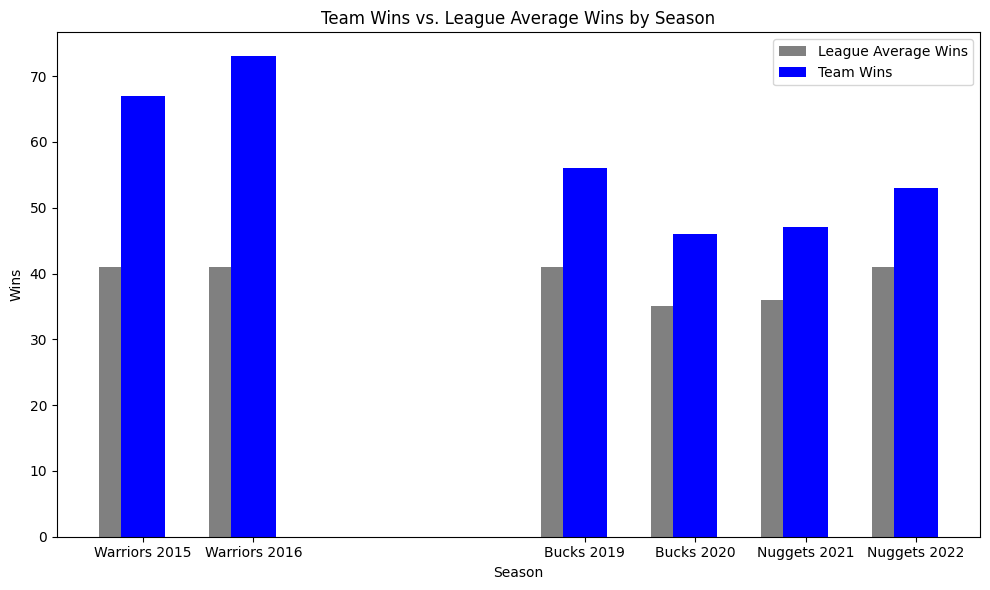

In [ ]:
import matplotlib.pyplot as plt

# Define the seasons and the corresponding league average wins and team wins
seasons = [2015, 2016, 2019, 2020, 2021, 2022]
league_average_wins = [41, 41, 41, 35, 36, 41]  # League average wins for each season
team_wins = [67, 73, 56, 46, 47, 53]  # Team wins for each season
plt.figure(figsize=(10, 6))

# Plot league average wins
plt.bar([season - 0.2 for season in seasons], league_average_wins, width=0.4, label='League Average Wins', color='gray')

# Plot team wins with specific team labels
team_labels = ['Warriors 2015', 'Warriors 2016', 'Bucks 2019', 'Bucks 2020', 'Nuggets 2021', 'Nuggets 2022']
plt.bar(seasons, team_wins, width=0.4, label='Team Wins', color='blue', tick_label=team_labels)
plt.xlabel('Season')
plt.xticks(seasons)
plt.ylabel('Wins')
plt.title('Team Wins vs. League Average Wins by Season')
plt.legend()
plt.tight_layout()
plt.show()


We can see that the teams with the respective MVPs of each season performed drastically better than the other teams that season. We can see this visualization by comparing the average wins of NBA teams that season with the wins of the MVP's team that season.

Beyond the players individual statistics, this goes to show that the MVP's team performs far better than the average NBA team that season.

# Model Questions
Throughout the EDAs we've explored various statistics beyond shooting metrics to understand what makes an MVP-caliber player. Specifically, we've explored rebounds per game and assists per game to gain insights into players like Giannis Antetokounmpo and Nikola Jokic, who do not excel in shooting like Stephen Curry but are impactful in other areas of the game. We've futher explored team perfomance metrics to understand the context of MVP seasons within the success of the players' teams. Given this analysis, here are two plausible models to consider:

## Model 1: Predicitng MVP Winners Based on Player Performance Metrics
**Independent Variables (Features)**: player statistics like points per game, rebounds per game, assists per game, shooting percentages, and advanced metrics such as player efficiency rating

**Dependent Variable (Target)**: MVP award status

**Methodology**: regression, decision trees, or random forests to predict whehter a player will win MVP award based on performance metrics. This model will help identify which player statistics are most strongly associated with winning the MVP award.

## Model 2: Predicting Team Success Based on Player and Team Performance Metrics
**Independent Variables (Features)**: Player performance metrics and team performance metrics (team wins, offensive rating, defensive rating)

**Dependent Variable (Target)**: Team Success (e.g. playoff appearance [MVP is a regular season award but they are considered a good team if regular season performance leads to a playoff berth], team wins compared to average team wins)

**Methodology**: Regression techniques such as linear regression or gradient boosting to predict team success based on combination of player and team performance metrics. This model will help identify key factors contributing to team's success, including impact of MVP-caliber players.

#Generating Models



##Data Preparation
First we need to import the required librarires and load and prepare the data


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
award_winners_df = pd.read_csv('/content/Player Award Shares.csv')
award_winners_df.head()

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,seas_id,player_id
0,2023,dpoy,Jaren Jackson Jr.,23,MEM,56.0,391.0,500.0,0.782,True,30733,4632
1,2023,dpoy,Brook Lopez,34,MIL,31.0,309.0,500.0,0.618,False,30508,3801
2,2023,dpoy,Evan Mobley,21,CLE,8.0,101.0,500.0,0.202,False,30640,4931
3,2023,dpoy,Draymond Green,32,GSW,3.0,34.0,500.0,0.068,False,30622,4085
4,2023,dpoy,Bam Adebayo,25,MIA,1.0,18.0,500.0,0.036,False,30489,4472


Then to make sure we know all the datatypes of the different columns

In [ ]:
# Check data types of all columns
print(award_winners_df.dtypes)

# Check data type of a specific column
print(award_winners_df['award'].dtype)
print(award_winners_df['winner'].dtype)


season         int64
award         object
player        object
age            int64
tm            object
first        float64
pts_won      float64
pts_max      float64
share        float64
winner        object
seas_id        int64
player_id      int64
dtype: object
object
object


As we can see, in this new award winners dataframe, award winners are determined by two columns: award and winner. We can determine the who the mvp winner was that season when the award is 'nba mvp' and the winner is True. Since it is originally in the dataframe as an object, we want to convert the value of winner into a boolean. We also want to use these two columns to create one column mvp_winner and delete the award and winner columns to make the data easier to read.

In [ ]:
# Convert 'winner' column to boolean type
award_winners_df['winner'] = award_winners_df['winner'].astype(bool)

# Create a new column 'mvp_winner' based on the criteria for MVP winners
award_winners_df['mvp_winner'] = (award_winners_df['award'] == 'nba mvp') & (award_winners_df['winner'] == True)

# Set mvp_winner to False for rows where award is not 'nba mvp' or winner is not True
award_winners_df.loc[(award_winners_df['award'] != 'nba mvp') | (award_winners_df['winner'] != True), 'mvp_winner'] = False

# Drop the original 'award' and 'winner' columns
award_winners_df.drop(['award', 'winner'], axis=1, inplace=True)


Let's see how this new dataframe is looking.

In [ ]:
award_winners_df.head()

,season,player,age,tm,first,pts_won,pts_max,share,seas_id,player_id,mvp_winner
0,2023,Jaren Jackson Jr.,23,MEM,56.0,391.0,500.0,0.782,30733,4632,False
1,2023,Brook Lopez,34,MIL,31.0,309.0,500.0,0.618,30508,3801,False
2,2023,Evan Mobley,21,CLE,8.0,101.0,500.0,0.202,30640,4931,False
3,2023,Draymond Green,32,GSW,3.0,34.0,500.0,0.068,30622,4085,False
4,2023,Bam Adebayo,25,MIA,1.0,18.0,500.0,0.036,30489,4472,False


Now we want to create a merged dataframe containing the information from player_per_game, player_shooting, and award_winners. This way we will have one dataframe to train our model with.

In [ ]:
# Step 1: Merge player_shooting_df and player_per_game_df
merged_df = player_per_game_df.merge(player_shooting_df, on='player', how='inner')

# Step 3: Merge the filtered MVP winners with the merged_df from step 1
merged_df = merged_df.merge(award_winners_df, on='player', how='inner')

# Now merged_df contains data for MVP winners and their corresponding performance metrics
# List of columns to keep
columns_to_keep = ['season_x', 'player_id_x', 'player', 'tm', 'mvp_winner', 'pts_per_game', 'trb_per_game', 'ast_per_game', 'fg_percent_y']

# Drop columns not in the list of columns to keep
merged_df = merged_df[columns_to_keep]
merged_df.head()



,season_x,player_id_x,player,tm,mvp_winner,pts_per_game,trb_per_game,ast_per_game,fg_percent_y
0,2024,4219,Aaron Gordon,DEN,False,13.8,6.5,3.4,0.551
1,2024,4219,Aaron Gordon,ORL,False,13.8,6.5,3.4,0.551
2,2024,4219,Aaron Gordon,DEN,False,13.8,6.5,3.4,0.564
3,2024,4219,Aaron Gordon,ORL,False,13.8,6.5,3.4,0.564
4,2024,4219,Aaron Gordon,DEN,False,13.8,6.5,3.4,0.520


Now since there are values missing in the field goal percentage column, we want to fill in the missing values with the mean of that column. This should not affect the accuracy of the models because the MVP's should have higher than average shooting efficiency

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the DataFrame
imputer.fit(merged_df[['fg_percent_y']])

# Impute missing values in the DataFrame
merged_df['fg_percent_y'] = imputer.transform(merged_df[['fg_percent_y']])


In [ ]:
merged_df.isnull().sum()

season_x              0
player_id_x           0
player                0
tm                    0
mvp_winner            0
pts_per_game          0
trb_per_game          0
ast_per_game          0
fg_percent_y          0
season            36238
team              36238
win_percentage    36238
dtype: int64

In [ ]:
merged_df.dtypes

season_x          int64
player_id_x       int64
player           object
tm               object
mvp_winner         bool
pts_per_game    float64
trb_per_game    float64
ast_per_game    float64
fg_percent_y    float64
dtype: object

Since there are innaccuraies in the datasets, we are removing all data before 1980, this way all data is fairly modern and around the time since advanced metrics have started getting tracked.

In [ ]:
# Filter out seasons before 1980 from merged_df
merged_df = merged_df[merged_df['season_x'] >= 1980]

# Filter out seasons before 1980 from team_summary_df
team_summary_df = team_summary_df[team_summary_df['season'] >= 1980]


Now to make sure our merged dataframe is accurate thus far, let's see if the dataframe accurately represents MVP winners to non-winners. There should be far less winners, obviously.

Class Counts:
mvp_winner
False    552880
True       8400
Name: count, dtype: int64
Unique Values:
[False  True]


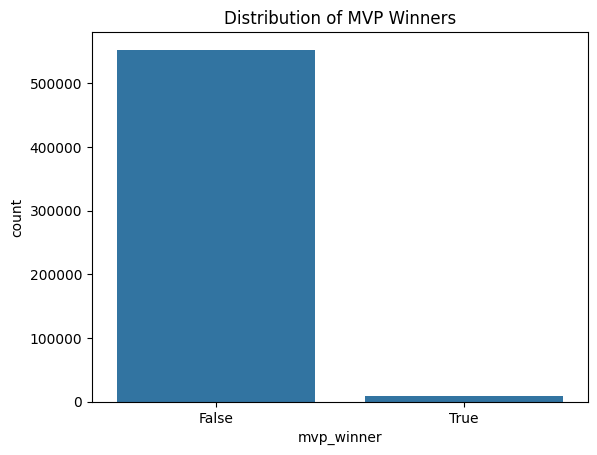

In [ ]:
# Count the occurrences of each class
class_counts = merged_df['mvp_winner'].value_counts()
print("Class Counts:")
print(class_counts)

# Check for unique values
unique_values = merged_df['mvp_winner'].unique()
print("Unique Values:")
print(unique_values)

# Visualize the distribution of classes
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='mvp_winner', data=merged_df)
plt.title('Distribution of MVP Winners')
plt.show()


Cool, our new merged data frame makes sense so far. Now let's actually create the model. We are going to use logistic regression because our target variable, mvp_winner, is either True or False. Also, it's very computationally efficient and can be trained quickly.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define features (X) and target variable (y)
X = merged_df[['pts_per_game', 'trb_per_game', 'ast_per_game', 'fg_percent_y']]
y = merged_df['mvp_winner']

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose a model (Logistic Regression in this example)
model = LogisticRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.984829318700114
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    110553
        True       0.00      0.00      0.00      1703

    accuracy                           0.98    112256
   macro avg       0.49      0.50      0.50    112256
weighted avg       0.97      0.98      0.98    112256



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now let's test if it actually works. Let's see if it can predict who won MVP in 2023. We know that it should tell us Joel Embiid.

In [ ]:
# Filter the DataFrame for the year 2023
mvp_2023 = merged_df[merged_df['season_x'] == 2023]

# Extract the features for the MVP candidates in 2023
X_2023 = mvp_2023[['pts_per_game', 'trb_per_game', 'ast_per_game', 'fg_percent_y']]

# Use the trained model to make predictions
predicted_mvp = model.predict(X_2023)

# Check if the predicted MVP matches the actual MVP winner
actual_mvp_winner = mvp_2023[mvp_2023['mvp_winner'] == True]['player'].values[0]
if any(predicted_mvp):
    predicted_mvp_winner = mvp_2023[predicted_mvp]['player'].values[0]
    print("Predicted MVP for 2023:", predicted_mvp_winner)
else:
    print("Model did not predict any MVP for 2023.")

Model did not predict any MVP for 2023.


Unfortunately, the model did not accurately determine who won the MVP award. Perhaps in the future we should be asking it to give us who the top potential award winners are instead of a sole name. Regardless, this model may not be very efficient anyways because it only uses player statistics instead of team success as well. As we all know, MVP's should lead their team to much success, so they can't be on a bad team. This will be reflected in model 2.

##Overall, Model 1 does not accurately predict the MVP winner.
The accuracy is very high at .985, but this is not the best metric for imbalanced datasets such as the one we have. The precision and recall for this model is 0, meaning no instanced predicted as MVP winner were True and correctly identified by the model. Also, the F1-score was 0 which reflects a poor performance by the model in identifying true positives (mvp_winner = True).

Perhaps the second model will be more accurate at predicting the MVP, by also incorporating team success.

#Model 2
This second model will incorporate team success as a metric for determining NBA MVP. Let's get to it by editing the team_summary dataframe that we imported above.

In [ ]:
team_summary_df.rename(columns={'team': 'tm'}, inplace=True)


We want the teams to be represented by one column in both, so we're going to stick with 'tm'.

In [ ]:
# Add the 'team' column to team_summary_df
team_summary_df['team'] = team_summary_df['abbreviation']

# Merge team_summary_df with merged_df
merged_df = merged_df.merge(team_summary_df[['season', 'team', 'win_percentage']],
                            left_on=['season_x', 'tm'],
                            right_on=['season', 'team'],
                            how='left')


MergeError: Passing 'suffixes' which cause duplicate columns {'season_x'} is not allowed.

This time, we're going to use the random forest classifier to train our model. We made this choice because we want to try something different from the logistic regression previously used. More so than that, it can provide us an accurate prediction determined by aggregating the prediction of all trees.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target variable
features = ['pts_per_game', 'trb_per_game', 'ast_per_game', 'fg_percent_y', 'win_percentage']
target = 'mvp_winner'

# Drop rows with missing values
data = merged_df.dropna(subset=features + [target])

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9839869724521645
Testing Accuracy: 0.9837252045062804


The model seems to be very accurate. It has a very high training accuracy and a very high testing accuracy. Overall, model 2 is a far better model for determining the MVP winner than model 1, because it also takes into account team success in the form of win percentage.